In [1]:
import xlrd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import math

In [2]:
train=pd.read_csv('C:\\Datasets\\Titanic\\train.csv')
test=pd.read_csv('C:\\Datasets\\Titanic\\test.csv')

In [3]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Vanden Steen, Mr. Leo Peter",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

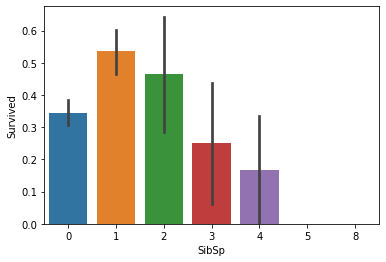

In [4]:
sns.barplot(x='SibSp',y='Survived',data=train)

In [5]:
train=train.fillna({"Embarked":"S"})
test=test.fillna({"Embarked":"S"})

In [6]:
combine=[train,test]
for dataset in combine:
    dataset['Title']=dataset['Name'].str.extract(pat='([A-Za-z]+)\.',expand=False)
pd.crosstab(train['Title'],train['Sex'])    

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [7]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [8]:
train[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [9]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)


In [10]:
age_array={1:32.36,2:21.84,3:35.78,4:4.57,5:41.0,6:46.0}
for i in range(len(train['Age'])):
    if math.isnan(train['Age'][i]):
        train['Age'][i]=age_array[train['Title'][i]]
for i in range(len(test['Age'])):
    if math.isnan(test['Age'][i]):
        test['Age'][i]=age_array[test['Title'][i]]        

<ipython-input-10-944cb38f34ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][i]=age_array[train['Title'][i]]
<ipython-input-10-944cb38f34ea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][i]=age_array[test['Title'][i]]


In [11]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [12]:
sex_mapping={'male':0,'female':1}
train['Sex']=train['Sex'].map(sex_mapping)
test['Sex']=test['Sex'].map(sex_mapping)

In [13]:
train=train.drop(['Ticket'],axis=1)
test=test.drop(['Ticket'],axis=1)

In [14]:
emb_map={'S':1,'C':2,'Q':3}
train['Embarked']=train['Embarked'].map(emb_map)
test['Embarked']=test['Embarked'].map(emb_map)

In [15]:
train['CabinBool'] = (train['Cabin'].notnull().astype('int'))
test['CabinBool'] = (test['Cabin'].notnull().astype('int'))

In [16]:
train=train.drop(['Cabin'],axis=1)
test=test.drop(['Cabin'],axis=1)

In [17]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)

In [20]:
y_val=np.array(y_val)
print(y_val)

[0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 0 0]


In [21]:
c=0
for i in range(len(y_pred)):
    if y_pred[i]==y_val[i]:
       c=c+1
print("Accuracy = ",(c/len(y_pred))*100)    

Accuracy =  84.26395939086294
